In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_excel('students.xlsx')
print(df)

  STUDENTS  KNOWLEDGE   COMMUNICATION  PRESENTATION      TARGET
0       MS          10            5.0           4.0      PLACED
1       KL           8            4.0           4.0      PLACED
2       RB          10            5.0           3.0      PLACED
3      VRB           7            2.0           3.5      PLACED
4      CHL           5            2.5           2.0  NOT PLACED
5      BHR           2            1.5           3.0  NOT PLACED
6      RAJ           9            3.0           2.0      PLACED


In [11]:
pip install xlrd >=2.0.1

Note: you may need to restart the kernel to use updated packages.


In [3]:
df

,STUDENTS,KNOWLEDGE,COMMUNICATION,PRESENTATION,TARGET
0,MS,10,5.0,4.0,PLACED
1,KL,8,4.0,4.0,PLACED
2,RB,10,5.0,3.0,PLACED
3,VRB,7,2.0,3.5,PLACED
4,CHL,5,2.5,2.0,NOT PLACED
5,BHR,2,1.5,3.0,NOT PLACED
6,RAJ,9,3.0,2.0,PLACED


### 1.Problem Statement

In [ ]:
to predict students is placed or not placed

### 2.Data Gathering

In [10]:
df

,STUDENTS,KNOWLEDGE,COMMUNICATION,PRESENTATION,TARGET
0,MS,10,5.0,4.0,PLACED
1,KL,8,4.0,4.0,PLACED
2,RB,10,5.0,3.0,PLACED
3,VRB,7,2.0,3.5,PLACED
4,CHL,5,2.5,2.0,NOT PLACED
5,BHR,2,1.5,3.0,NOT PLACED
6,RAJ,9,3.0,2.0,PLACED


In [15]:
new_row={"STUDENTS":"vishnu",
         "KNOWLEDGE":9.0,
         "COMMUNICATION":5,
         "PRESENTATION":5,
         "TARGET":"PLACED"}
new_row

{'STUDENTS': 'vishnu',
 'KNOWLEDGE': 9.0,
 'COMMUNICATION': 5,
 'PRESENTATION': 5,
 'TARGET': 'PLACED'}

In [16]:
df.loc[len(df)]=new_row

In [17]:
df

,STUDENTS,KNOWLEDGE,COMMUNICATION,PRESENTATION,TARGET
0,MS,10.0,5.0,4.0,PLACED
1,KL,8.0,4.0,4.0,PLACED
2,RB,10.0,5.0,3.0,PLACED
3,VRB,7.0,2.0,3.5,PLACED
4,CHL,5.0,2.5,2.0,NOT PLACED
5,BHR,2.0,1.5,3.0,NOT PLACED
6,RAJ,9.0,3.0,2.0,PLACED
7,vishnu,NaN,5.0,5.0,PLACED
8,Nitin,NaN,3.0,2.0,NOT PLACED
9,vishnu,NaN,5.0,5.0,PLACED


In [18]:
df=df.drop([9],axis=0)
df

,STUDENTS,KNOWLEDGE,COMMUNICATION,PRESENTATION,TARGET
0,MS,10.0,5.0,4.0,PLACED
1,KL,8.0,4.0,4.0,PLACED
2,RB,10.0,5.0,3.0,PLACED
3,VRB,7.0,2.0,3.5,PLACED
4,CHL,5.0,2.5,2.0,NOT PLACED
5,BHR,2.0,1.5,3.0,NOT PLACED
6,RAJ,9.0,3.0,2.0,PLACED
7,vishnu,NaN,5.0,5.0,PLACED
8,Nitin,NaN,3.0,2.0,NOT PLACED


In [6]:
new_row={"STUDENTS":"Nitin",
         "KNOWLEDGE":5.0,
         "COMMUNICATION":3,
         "PRESENTATION":2,
         "TARGET":"NOT PLACED"}
new_row

{'STUDENTS': 'Nitin',
 'KNOWLEDGE': 5,
 'COMMUNICATION': 3,
 'PRESENTATION': 2,
 'TARGET': 'NOT PLACED'}

In [7]:
df.loc[len(df)]=new_row

In [8]:
df

,STUDENTS,KNOWLEDGE,COMMUNICATION,PRESENTATION,TARGET
0,MS,10.0,5.0,4.0,PLACED
1,KL,8.0,4.0,4.0,PLACED
2,RB,10.0,5.0,3.0,PLACED
3,VRB,7.0,2.0,3.5,PLACED
4,CHL,5.0,2.5,2.0,NOT PLACED
5,BHR,2.0,1.5,3.0,NOT PLACED
6,RAJ,9.0,3.0,2.0,PLACED
7,vishnu,NaN,5.0,5.0,PLACED
8,Nitin,NaN,3.0,2.0,NOT PLACED


### 3.EDA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   STUDENTS       9 non-null      object 
 1   KNOWLEDGE      7 non-null      float64
 2   COMMUNICATION  9 non-null      float64
 3   PRESENTATION   9 non-null      float64
 4   TARGET         9 non-null      object 
dtypes: float64(3), object(2)
memory usage: 432.0+ bytes


In [10]:
x=df.drop(["STUDENTS","TARGET"],axis=1)
y=df["TARGET"]

In [12]:
x.corr()

,KNOWLEDGE,COMMUNICATION,PRESENTATION
KNOWLEDGE,1.000000,0.844974,0.262000
COMMUNICATION,0.844974,1.000000,0.550205
PRESENTATION,0.262000,0.550205,1.000000


<Axes: >

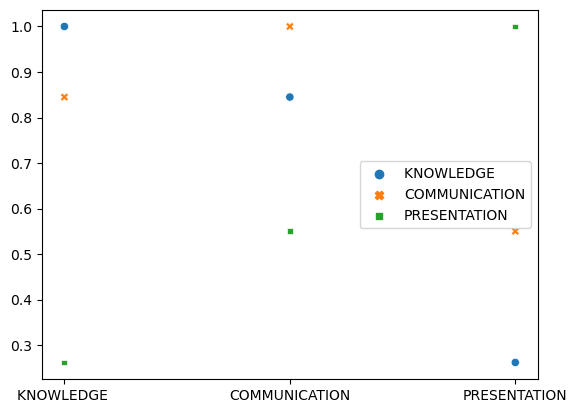

In [13]:
sns.scatterplot(x.corr())

C:\Users\vishn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vishn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vishn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


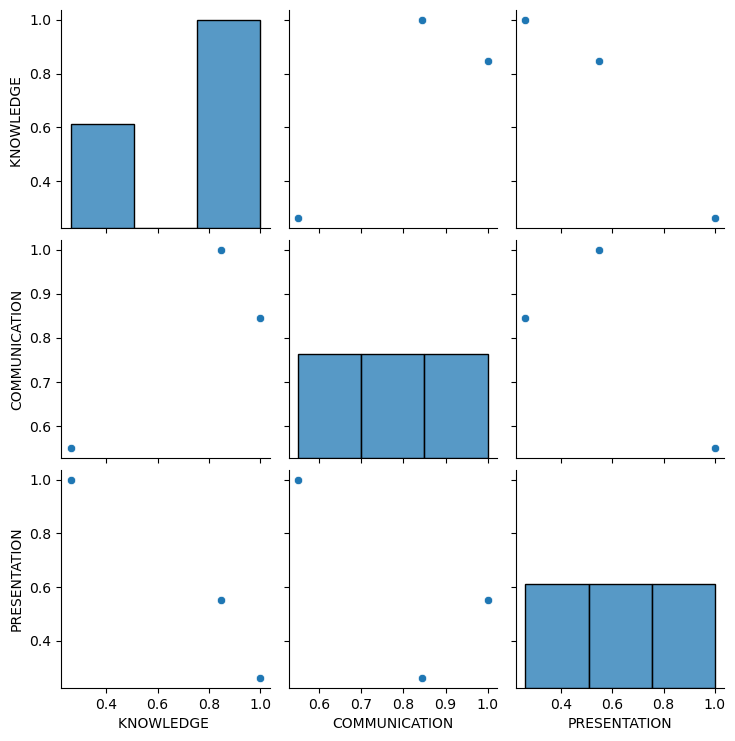

In [14]:
sns.pairplot(x.corr())

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   STUDENTS       9 non-null      object 
 1   KNOWLEDGE      7 non-null      float64
 2   COMMUNICATION  9 non-null      float64
 3   PRESENTATION   9 non-null      float64
 4   TARGET         9 non-null      object 
dtypes: float64(3), object(2)
memory usage: 432.0+ bytes


In [11]:
df.isna().sum()

STUDENTS         0
KNOWLEDGE        2
COMMUNICATION    0
PRESENTATION     0
TARGET           0
dtype: int64

In [19]:
df

,STUDENTS,KNOWLEDGE,COMMUNICATION,PRESENTATION,TARGET
0,MS,10.0,5.0,4.0,PLACED
1,KL,8.0,4.0,4.0,PLACED
2,RB,10.0,5.0,3.0,PLACED
3,VRB,7.0,2.0,3.5,PLACED
4,CHL,5.0,2.5,2.0,NOT PLACED
5,BHR,2.0,1.5,3.0,NOT PLACED
6,RAJ,9.0,3.0,2.0,PLACED
7,vishnu,NaN,5.0,5.0,PLACED
8,Nitin,NaN,3.0,2.0,NOT PLACED


In [22]:
df=df.fillna(5)

In [23]:
df

,STUDENTS,KNOWLEDGE,COMMUNICATION,PRESENTATION,TARGET
0,MS,10.0,5.0,4.0,PLACED
1,KL,8.0,4.0,4.0,PLACED
2,RB,10.0,5.0,3.0,PLACED
3,VRB,7.0,2.0,3.5,PLACED
4,CHL,5.0,2.5,2.0,NOT PLACED
5,BHR,2.0,1.5,3.0,NOT PLACED
6,RAJ,9.0,3.0,2.0,PLACED
7,vishnu,5.0,5.0,5.0,PLACED
8,Nitin,5.0,3.0,2.0,NOT PLACED


In [27]:
x=df.drop(["STUDENTS","TARGET"],axis=1)
y=df["TARGET"]

In [28]:
x.corr()

,KNOWLEDGE,COMMUNICATION,PRESENTATION
KNOWLEDGE,1.000000,0.621023,0.100785
COMMUNICATION,0.621023,1.000000,0.550205
PRESENTATION,0.100785,0.550205,1.000000


<Axes: >

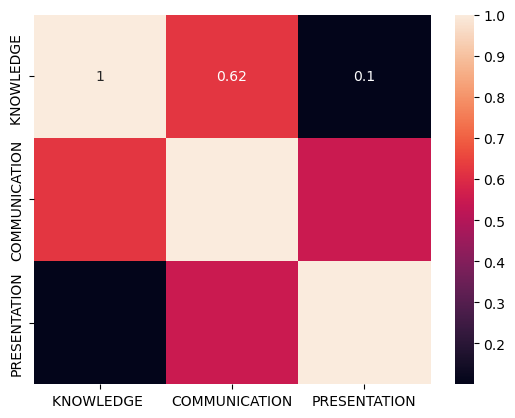

In [30]:
sns.heatmap(x.corr(),annot=True)

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
vif_list=[]
for i in range(x.shape[1]):
    vif=variance_inflation_factor(x.to_numpy(),i)
    print(f"vif is {x.columns[i]} >>",vif)
    vif_list.append(vif)

vif is KNOWLEDGE  >> 10.96008404697371
vif is COMMUNICATION >> 21.57315889685801
vif is PRESENTATION >> 10.618451159779555


<Axes: >

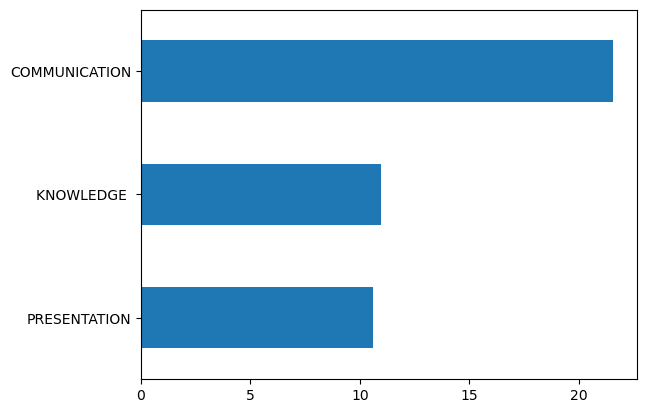

In [35]:
s1=pd.Series(vif_list,index=x.columns)
s1.sort_values().plot(kind="barh")

### 4.Feature Engineering

### 5.Feature selection

### 6.Model Training

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=41,stratify=y)

In [38]:
x_train

,KNOWLEDGE,COMMUNICATION,PRESENTATION
7,5.0,5.0,5.0
1,8.0,4.0,4.0
8,5.0,3.0,2.0
2,10.0,5.0,3.0
3,7.0,2.0,3.5
0,10.0,5.0,4.0
5,2.0,1.5,3.0


In [39]:
y_train

7        PLACED
1        PLACED
8    NOT PLACED
2        PLACED
3        PLACED
0        PLACED
5    NOT PLACED
Name: TARGET, dtype: object

In [40]:
x_test

,KNOWLEDGE,COMMUNICATION,PRESENTATION
4,5.0,2.5,2.0
6,9.0,3.0,2.0


In [41]:
y_test

4    NOT PLACED
6        PLACED
Name: TARGET, dtype: object

#### LogesticRegression model

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
lg_model=LogisticRegression()
lg_model.fit(x_train,y_train)

LogisticRegression()

In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

##### Evaluation

In [45]:
#Evaluation on training
y_pred_train=lg_model.predict(x_train)

confusion=confusion_matrix(y_train,y_pred_train)
print("confusion:\n",confusion)

clf=classification_report(y_train,y_pred_train)
print("clf:\n",clf)

accuracy=accuracy_score(y_train,y_pred_train)
print("accuracy:",accuracy)

confusion:
 [[2 0]
 [0 5]]
clf:
               precision    recall  f1-score   support

  NOT PLACED       1.00      1.00      1.00         2
      PLACED       1.00      1.00      1.00         5

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7

accuracy: 1.0


In [46]:
#Evaluation on testing
y_pred=lg_model.predict(x_test)

confusion=confusion_matrix(y_test,y_pred)
print("confusion:\n",confusion)

clf=classification_report(y_test,y_pred)
print("clf:\n",clf)

accuracy=accuracy_score(y_test,y_pred)
print("accuracy:",accuracy)

confusion:
 [[1 0]
 [0 1]]
clf:
               precision    recall  f1-score   support

  NOT PLACED       1.00      1.00      1.00         1
      PLACED       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

accuracy: 1.0


#### KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
knn_model= KNeighborsClassifier()
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [49]:
#Evaluation on training
y_pred_train=knn_model.predict(x_train)

confusion=confusion_matrix(y_train,y_pred_train)
print("confusion:\n",confusion)

clf=classification_report(y_train,y_pred_train)
print("clf:\n",clf)

accuracy=accuracy_score(y_train,y_pred_train)
print("accuracy:",accuracy)

confusion:
 [[0 2]
 [0 5]]
clf:
               precision    recall  f1-score   support

  NOT PLACED       0.00      0.00      0.00         2
      PLACED       0.71      1.00      0.83         5

    accuracy                           0.71         7
   macro avg       0.36      0.50      0.42         7
weighted avg       0.51      0.71      0.60         7

accuracy: 0.7142857142857143


C:\Users\vishn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vishn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vishn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
#Evaluation on testing
y_pred=knn_model.predict(x_test)

confusion=confusion_matrix(y_test,y_pred)
print("confusion:\n",confusion)

clf=classification_report(y_test,y_pred)
print("clf:\n",clf)

accuracy=accuracy_score(y_test,y_pred)
print("accuracy:",accuracy)

confusion:
 [[0 1]
 [0 1]]
clf:
               precision    recall  f1-score   support

  NOT PLACED       0.00      0.00      0.00         1
      PLACED       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

accuracy: 0.5


C:\Users\vishn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vishn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vishn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
Note:we got bad accuracy using KNN 
because knn is distance based algorithm and there is scaling required

### Deicion Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [80]:
#Evaluation on training
y_pred_train=dt_model.predict(x_train)

confusion=confusion_matrix(y_train,y_pred_train)
print("confusion:\n",confusion)

clf=classification_report(y_train,y_pred_train)
print("clf:\n",clf)

accuracy=accuracy_score(y_train,y_pred_train)
print("accuracy:",accuracy)

confusion:
 [[2 0]
 [0 5]]
clf:
               precision    recall  f1-score   support

  NOT PLACED       1.00      1.00      1.00         2
      PLACED       1.00      1.00      1.00         5

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7

accuracy: 1.0


In [81]:
#Evaluation on testing
y_pred=dt_model.predict(x_test)

confusion=confusion_matrix(y_test,y_pred)
print("confusion:\n",confusion)

clf=classification_report(y_test,y_pred)
print("clf:\n",clf)

accuracy=accuracy_score(y_test,y_pred)
print("accuracy:",accuracy)

confusion:
 [[1 0]
 [0 1]]
clf:
               precision    recall  f1-score   support

  NOT PLACED       1.00      1.00      1.00         1
      PLACED       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

accuracy: 1.0


### Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

In [56]:
rnd_model=RandomForestClassifier()
rnd_model.fit(x_train,y_train)

RandomForestClassifier()

In [57]:
#Evaluation on training
y_pred_train=rnd_model.predict(x_train)

confusion=confusion_matrix(y_train,y_pred_train)
print("confusion:\n",confusion)

clf=classification_report(y_train,y_pred_train)
print("clf:\n",clf)

accuracy=accuracy_score(y_train,y_pred_train)
print("accuracy:",accuracy)

confusion:
 [[2 0]
 [0 5]]
clf:
               precision    recall  f1-score   support

  NOT PLACED       1.00      1.00      1.00         2
      PLACED       1.00      1.00      1.00         5

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7

accuracy: 1.0


In [58]:
#Evaluation on testing
y_pred=rnd_model.predict(x_test)

confusion=confusion_matrix(y_test,y_pred)
print("confusion:\n",confusion)

clf=classification_report(y_test,y_pred)
print("clf:\n",clf)

accuracy=accuracy_score(y_test,y_pred)
print("accuracy:",accuracy)

confusion:
 [[1 0]
 [0 1]]
clf:
               precision    recall  f1-score   support

  NOT PLACED       1.00      1.00      1.00         1
      PLACED       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

accuracy: 1.0


### AdaBoost

In [59]:
adb_model=AdaBoostClassifier()
adb_model.fit(x_train,y_train)

AdaBoostClassifier()

In [60]:
#Evaluation on training
y_pred_train=adb_model.predict(x_train)

confusion=confusion_matrix(y_train,y_pred_train)
print("confusion:\n",confusion)

clf=classification_report(y_train,y_pred_train)
print("clf:\n",clf)

accuracy=accuracy_score(y_train,y_pred_train)
print("accuracy:",accuracy)

confusion:
 [[2 0]
 [0 5]]
clf:
               precision    recall  f1-score   support

  NOT PLACED       1.00      1.00      1.00         2
      PLACED       1.00      1.00      1.00         5

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7

accuracy: 1.0


In [61]:
#Evaluation on testing
y_pred=adb_model.predict(x_test)

confusion=confusion_matrix(y_test,y_pred)
print("confusion:\n",confusion)

clf=classification_report(y_test,y_pred)
print("clf:\n",clf)

accuracy=accuracy_score(y_test,y_pred)
print("accuracy:",accuracy)

confusion:
 [[1 0]
 [1 0]]
clf:
               precision    recall  f1-score   support

  NOT PLACED       0.50      1.00      0.67         1
      PLACED       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

accuracy: 0.5


C:\Users\vishn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vishn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vishn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
Note:AdaBoost algorithm get overfitted ,give us good accuracy on training data but not on testing data
     low bias and High Varinace 

### Naive Bayes

In [62]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [69]:
nb_model1=GaussianNB()
nb_model1.fit(x_train,y_train)

GaussianNB()

In [70]:
#Evaluation on training
y_pred_train=nb_model1.predict(x_train)

confusion=confusion_matrix(y_train,y_pred_train)
print("confusion:\n",confusion)

clf=classification_report(y_train,y_pred_train)
print("clf:\n",clf)

accuracy=accuracy_score(y_train,y_pred_train)
print("accuracy:",accuracy)

confusion:
 [[2 0]
 [0 5]]
clf:
               precision    recall  f1-score   support

  NOT PLACED       1.00      1.00      1.00         2
      PLACED       1.00      1.00      1.00         5

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7

accuracy: 1.0


In [71]:
#Evaluation on testing
y_pred=nb_model1.predict(x_test)

confusion=confusion_matrix(y_test,y_pred)
print("confusion:\n",confusion)

clf=classification_report(y_test,y_pred)
print("clf:\n",clf)

accuracy=accuracy_score(y_test,y_pred)
print("accuracy:",accuracy)

confusion:
 [[1 0]
 [0 1]]
clf:
               precision    recall  f1-score   support

  NOT PLACED       1.00      1.00      1.00         1
      PLACED       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

accuracy: 1.0


In [72]:
nb_model2=MultinomialNB()
nb_model2.fit(x_train,y_train)

MultinomialNB()

In [74]:
#Evaluation on training
y_pred_train=nb_model2.predict(x_train)

confusion=confusion_matrix(y_train,y_pred_train)
print("confusion:\n",confusion)

clf=classification_report(y_train,y_pred_train)
print("clf:\n",clf)

accuracy=accuracy_score(y_train,y_pred_train)
print("accuracy:",accuracy)

confusion:
 [[0 2]
 [0 5]]
clf:
               precision    recall  f1-score   support

  NOT PLACED       0.00      0.00      0.00         2
      PLACED       0.71      1.00      0.83         5

    accuracy                           0.71         7
   macro avg       0.36      0.50      0.42         7
weighted avg       0.51      0.71      0.60         7

accuracy: 0.7142857142857143


C:\Users\vishn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vishn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vishn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
#Evaluation on testing
y_pred=nb_model2.predict(x_test)

confusion=confusion_matrix(y_test,y_pred)
print("confusion:\n",confusion)

clf=classification_report(y_test,y_pred)
print("clf:\n",clf)

accuracy=accuracy_score(y_test,y_pred)
print("accuracy:",accuracy)

confusion:
 [[0 1]
 [0 1]]
clf:
               precision    recall  f1-score   support

  NOT PLACED       0.00      0.00      0.00         1
      PLACED       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

accuracy: 0.5


C:\Users\vishn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vishn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vishn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
Note:we got bad accuracy,
because multinomial naive bayes algorithm accept categorical 

In [76]:
nb_model3=BernoulliNB()
nb_model3.fit(x_train,y_train)

BernoulliNB()

In [77]:
#Evaluation on training
y_pred_train=nb_model3.predict(x_train)

confusion=confusion_matrix(y_train,y_pred_train)
print("confusion:\n",confusion)

clf=classification_report(y_train,y_pred_train)
print("clf:\n",clf)

accuracy=accuracy_score(y_train,y_pred_train)
print("accuracy:",accuracy)

confusion:
 [[0 2]
 [0 5]]
clf:
               precision    recall  f1-score   support

  NOT PLACED       0.00      0.00      0.00         2
      PLACED       0.71      1.00      0.83         5

    accuracy                           0.71         7
   macro avg       0.36      0.50      0.42         7
weighted avg       0.51      0.71      0.60         7

accuracy: 0.7142857142857143


C:\Users\vishn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vishn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vishn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
#Evaluation on testing
y_pred=nb_model3.predict(x_test)

confusion=confusion_matrix(y_test,y_pred)
print("confusion:\n",confusion)

clf=classification_report(y_test,y_pred)
print("clf:\n",clf)

accuracy=accuracy_score(y_test,y_pred)
print("accuracy:",accuracy)

confusion:
 [[0 1]
 [0 1]]
clf:
               precision    recall  f1-score   support

  NOT PLACED       0.00      0.00      0.00         1
      PLACED       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

accuracy: 0.5


C:\Users\vishn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vishn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vishn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
Note:we got bad accuracy using Bernauli naive bayes beacuse all data should be in binary >>0 and 1

In [82]:
df

,STUDENTS,KNOWLEDGE,COMMUNICATION,PRESENTATION,TARGET
0,MS,10.0,5.0,4.0,PLACED
1,KL,8.0,4.0,4.0,PLACED
2,RB,10.0,5.0,3.0,PLACED
3,VRB,7.0,2.0,3.5,PLACED
4,CHL,5.0,2.5,2.0,NOT PLACED
5,BHR,2.0,1.5,3.0,NOT PLACED
6,RAJ,9.0,3.0,2.0,PLACED
7,vishnu,5.0,5.0,5.0,PLACED
8,Nitin,5.0,3.0,2.0,NOT PLACED


In [83]:
df.to_csv('student.csv', index=False)

In [84]:
df

,STUDENTS,KNOWLEDGE,COMMUNICATION,PRESENTATION,TARGET
0,MS,10.0,5.0,4.0,PLACED
1,KL,8.0,4.0,4.0,PLACED
2,RB,10.0,5.0,3.0,PLACED
3,VRB,7.0,2.0,3.5,PLACED
4,CHL,5.0,2.5,2.0,NOT PLACED
5,BHR,2.0,1.5,3.0,NOT PLACED
6,RAJ,9.0,3.0,2.0,PLACED
7,vishnu,5.0,5.0,5.0,PLACED
8,Nitin,5.0,3.0,2.0,NOT PLACED


In [85]:
df=pd.read_csv("student.csv")
df

,STUDENTS,KNOWLEDGE,COMMUNICATION,PRESENTATION,TARGET
0,MS,10.0,5.0,4.0,PLACED
1,KL,8.0,4.0,4.0,PLACED
2,RB,10.0,5.0,3.0,PLACED
3,VRB,7.0,2.0,3.5,PLACED
4,CHL,5.0,2.5,2.0,NOT PLACED
5,BHR,2.0,1.5,3.0,NOT PLACED
6,RAJ,9.0,3.0,2.0,PLACED
7,vishnu,5.0,5.0,5.0,PLACED
8,Nitin,5.0,3.0,2.0,NOT PLACED


In [88]:
x.columns

Index(['KNOWLEDGE ', 'COMMUNICATION', 'PRESENTATION'], dtype='object')

In [90]:
test_array=np.zeros(len(x.columns))
test_array

array([0., 0., 0.])

In [111]:
KNOWLEDGE=8
COMMUNICATION=4
PRESENTATION=3

In [112]:
test_array[0]=KNOWLEDGE

In [113]:
test_array[1]=COMMUNICATION

In [114]:
test_array[2]=PRESENTATION

In [115]:
test_array

array([8., 4., 3.])

In [116]:
dt_model.predict([test_array])[0]

C:\Users\vishn\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


'PLACED'

In [117]:
import pickle
with open("dt_model.pkl","wb") as f:
    pickle.dump(dt_model,f)

In [124]:
student_data={"columns":list(x.columns)}
student_data

{'columns': ['KNOWLEDGE ', 'COMMUNICATION', 'PRESENTATION']}

In [125]:
import json
with open("student_data.json","w") as f:
    json.dump(student_data,f)